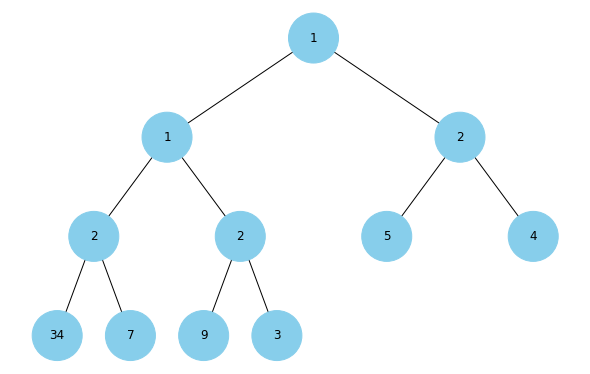

In [3]:
#Завдання 4 (зразок, перевірений)
import uuid
import heapq

import networkx as nx
import matplotlib.pyplot as plt


class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # Використовуйте значення вузла для міток

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()


def build_heap_tree(heap, index=0):
    if index >= len(heap):
        return None
    node = Node(heap[index])
    left_index = 2 * index + 1
    right_index = 2 * index + 2
    node.left = build_heap_tree(heap, left_index)
    node.right = build_heap_tree(heap, right_index)
    return node


if __name__ == '__main__':
    # Припустимо, що у нас є бінарна купа у вигляді масиву
    heap_array = [1, 3, 5, 7, 9, 2, 4, 34, 2, 1, 2]
    heapq.heapify(heap_array)
    # Побудова дерева з купи
    heap_tree_root = build_heap_tree(heap_array)

    # Відображення бінарної купи у вигляді дерева
    draw_tree(heap_tree_root)

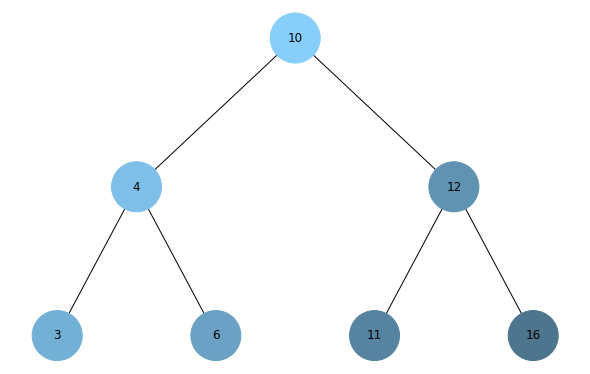

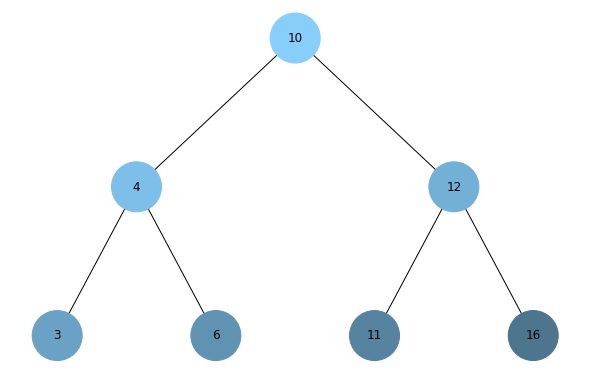

In [4]:
#Завдання 5. Зразок перевірений
import uuid
import networkx as nx
import matplotlib.pyplot as plt


class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root, colors):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    node_colors = [colors.get(node, 'skyblue') for node in tree.nodes()]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=node_colors)
    plt.show()


def generate_color(step, total_steps):
    base_color = [135, 206, 250]  # світло-блакитний (skyblue) у форматі RGB
    darken_factor = step / (2 * total_steps)  # Наскільки темнішим має бути кожен наступний вузол
    new_color = [int(c * (1 - darken_factor)) for c in base_color]
    return f'#{new_color[0]:02x}{new_color[1]:02x}{new_color[2]:02x}'


def dfs_visualize(root, total_steps):
    visited = set()
    stack = [root]
    colors = {}
    step = 0

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            colors[node.id] = generate_color(step, total_steps)
            step += 1

            # Додаємо дочірні вузли в стек (спочатку правий, потім лівий)
            if node.right:
                stack.append(node.right)
            if node.left:
                stack.append(node.left)

    return colors


def bfs_visualize(root, total_steps=1):
    visited, queue = set(), [root]
    colors = {}
    step = 0

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            colors[node.id] = generate_color(step, total_steps)
            step += 1
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

    return colors


def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)


if __name__ == '__main__':

    # Створення та візуалізація дерева
    root = Node(10)
    root.left = Node(4)
    root.left.left = Node(3)
    root.left.right = Node(6)
    root.right = Node(12)
    root.right.left = Node(11)
    root.right.right = Node(16)

    # Обрахунок кількості кроків (вузлів)
    total_steps = count_nodes(root)

    # DFS візуалізація
    dfs_colors = dfs_visualize(root, total_steps=total_steps)
    draw_tree(root, dfs_colors)

    # BFS візуалізація
    bfs_colors = bfs_visualize(root, total_steps=total_steps)
    draw_tree(root, bfs_colors)